# Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu, false_discovery_control

# Loading

In [ ]:
data = pd.read_excel(
    "/path/to/data/wildling_detc_lc_quantification.xlsx",
)

data = data[data["timepoint"] != "P100"]

# Figures

## Setup

In [ ]:
plt.rcParams.update(
    {
        "font.family": "Arial",
        "font.size": 8,
        "axes.titlesize": "medium",
        "figure.titlesize": "medium",
        "figure.labelsize": "medium",
        "legend.fontsize": 8.0,
    }
)

## Colors

In [ ]:
microbiota_status_colors = {
    "germfree": "#1b9e77",
    "spf": "#d95f02",
    "wildling": "#7570b3",
}

## DETC

In [ ]:
timepoints = data["timepoint"].unique()

p_vals = {}
for timepoint in timepoints:
    p_vals[timepoint] = mannwhitneyu(
        data[(data["celltype"] == "DETC") & (data["timepoint"] == timepoint) & (data["microbiota_status"] == "spf")]["number"],
        data[(data["celltype"] == "DETC") & (data["timepoint"] == timepoint) & (data["microbiota_status"] == "wildling")]["number"],
    ).pvalue

p_vals = pd.Series(p_vals)
p_vals_corrected = false_discovery_control(p_vals)

detc_p_vals = pd.DataFrame(
    {
        'timepoint': p_vals.index,
        'p_vals': p_vals.values,
        'p_vals_corrected': p_vals_corrected
    }
)

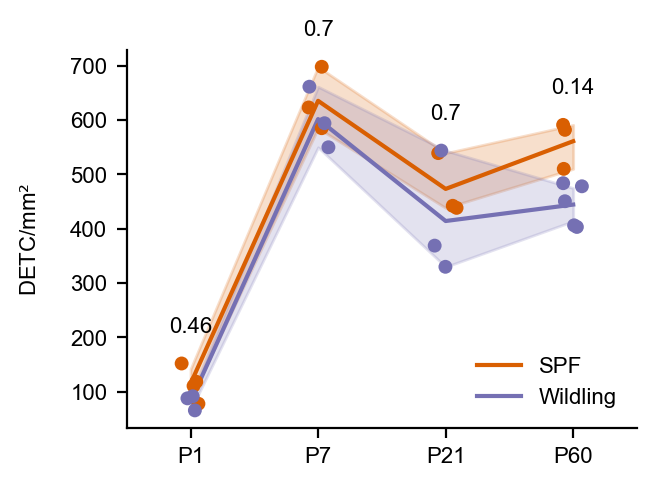

In [ ]:
pos = [0.18, 0.1, 0.81, 0.8]

fig, axes = plt.subplots(figsize=(80 / 25.4, 60 / 25.4), dpi=200)

sns.lineplot(
    x="timepoint",
    y="number",
    hue="microbiota_status",
    data=data[data["celltype"] == "DETC"],
    ax=axes,
    palette=microbiota_status_colors,
)

sns.stripplot(
    x="timepoint",
    y="number",
    hue="microbiota_status",
    data=data[data["celltype"] == "DETC"],
    ax=axes,
    palette=microbiota_status_colors,
    legend=None,
)

handles, labels = axes.get_legend_handles_labels()

axes.legend(handles=handles, labels=["SPF", "Wildling"], loc="best", frameon=False)

axes.spines["right"].set_visible(False)
axes.spines["top"].set_visible(False)

axes.set_title("")
axes.set_ylabel("DETC/mm$²$")

axes.yaxis.set_label_coords(-0.17, 0.5)
axes.set_xlabel('')

xticks = axes.get_xticks()
xticklabels = axes.get_xticklabels()

for xpos, label in zip(xticks, xticklabels):
    text = label.get_text()

    y = data[(data['timepoint'] == text) & (data['celltype'] == 'DETC')]['number'].max() + 50
    axes.text(
        x=xpos,
        y=y,
        s=round(detc_p_vals[detc_p_vals['timepoint'] == text]['p_vals_corrected'].values[0], 2),
        ha='center',
        va='bottom'
    )

axes.set_position(pos)

## LCs

In [ ]:
timepoints = data["timepoint"].unique()

p_vals = {}
for timepoint in timepoints:
    p_vals[timepoint] = mannwhitneyu(
        data[(data["celltype"] == "LC") & (data["timepoint"] == timepoint) & (data["microbiota_status"] == "spf")]["number"],
        data[(data["celltype"] == "LC") & (data["timepoint"] == timepoint) & (data["microbiota_status"] == "wildling")]["number"],
    ).pvalue

p_vals = pd.Series(p_vals)
p_vals_corrected = false_discovery_control(p_vals)

lc_p_vals = pd.DataFrame(
    {
        'timepoint': p_vals.index,
        'p_vals': p_vals.values,
        'p_vals_corrected': p_vals_corrected
    }
)

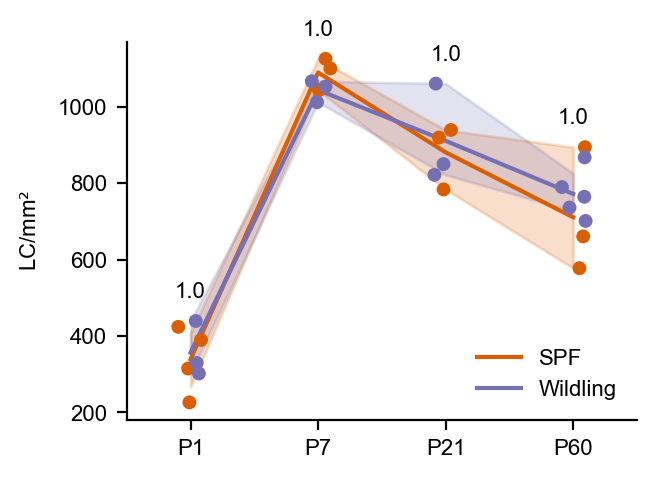

In [ ]:
pos = [0.18, 0.1, 0.81, 0.8]

fig, axes = plt.subplots(figsize=(80 / 25.4, 60 / 25.4), dpi=200)

sns.lineplot(
    x="timepoint",
    y="number",
    hue="microbiota_status",
    data=data[data["celltype"] == "LC"],
    ax=axes,
    palette=microbiota_status_colors,
)

sns.stripplot(
    x="timepoint",
    y="number",
    hue="microbiota_status",
    data=data[data["celltype"] == "LC"],
    ax=axes,
    palette=microbiota_status_colors,
    legend=None,
)

handles, labels = axes.get_legend_handles_labels()

axes.legend(handles=handles, labels=["SPF", "Wildling"], loc="best", frameon=False)

axes.spines["right"].set_visible(False)
axes.spines["top"].set_visible(False)

axes.set_title("")
axes.set_ylabel("LC/mm$²$")
axes.yaxis.set_label_coords(-0.17, 0.5)
axes.set_xlabel('')

xticks = axes.get_xticks()
xticklabels = axes.get_xticklabels()

for xpos, label in zip(xticks, xticklabels):
    text = label.get_text()

    y = data[(data['timepoint'] == text) & (data['celltype'] == 'LC')]['number'].max() + 50
    axes.text(
        x=xpos,
        y=y,
        s=round(lc_p_vals[lc_p_vals['timepoint'] == text]['p_vals_corrected'].values[0], 2),
        ha='center',
        va='bottom'
    )

axes.set_position(pos)